# Explorations

## Import packages and load data

### Packages

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from stopwords_loader import *

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

### Lexicons and corpus

In [27]:
anew_lexicon_path = Path('..', 'lexicon', 'ANEW2017', 'ANEW2017All.txt')
anew_lexicon = pd.read_csv(anew_lexicon_path, sep='\t')
anew_lexicon_list = anew_lexicon.Word.to_list()


In [28]:
nrc_lexicon_path = Path('..', 'lexicon', 'NRC-VAD-Lexicon-Aug2018Release', 'NRC-VAD-Lexicon.txt')
nrc_lexicon = pd.read_csv(nrc_lexicon_path, sep='\t', names=['Word', 'Valence', 'Arousal', 'Dominance'])
nrc_lexicon_list = nrc_lexicon.Word.to_list()

In [29]:
len(set(nrc_lexicon_list).intersection(set(anew_lexicon_list)))

3094

In [30]:
data_df = pd.read_csv('../data/tweets/ExtractedTweets.csv')
data_df.head(3)

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...


In [31]:
text_list = data_df.Tweet.to_list()

### Stopwords

In [9]:
procedural_words = load_procedural_words()
nltk_stopwords = load_nltk_stopwords()
ordinal_cardinal_words = load_number_words()

The names of months, weekdays, human names, cities, states, and counties will be removed only when the first letter is capital

## Lexicons and stopwords exploration

In [23]:
print("The numbers of NRC / ANEW lexicons")
print(len(nrc_lexicon),
      '\n',
      len(anew_lexicon))

The numbers of NRC / ANEW lexicons
19971 
 3188


In [24]:
def plot_lexicon_hist(lexicon_df, val_col, aro_col, dom_col):
      fig, axs = plt.subplots(1, 3, figsize=(15,5))
      axs = axs.ravel()
      lexicon_df[val_col].hist(bins=9, ax=axs[0])
      axs[0].set_title('Valence', fontsize=22)
      lexicon_df[aro_col].hist(bins=9, ax=axs[1])
      axs[1].set_title('Arousal', fontsize=22)
      lexicon_df[dom_col].hist(bins=9, ax=axs[2])
      axs[2].set_title('Dominance', fontsize=20)
      plt.show()

ANEW


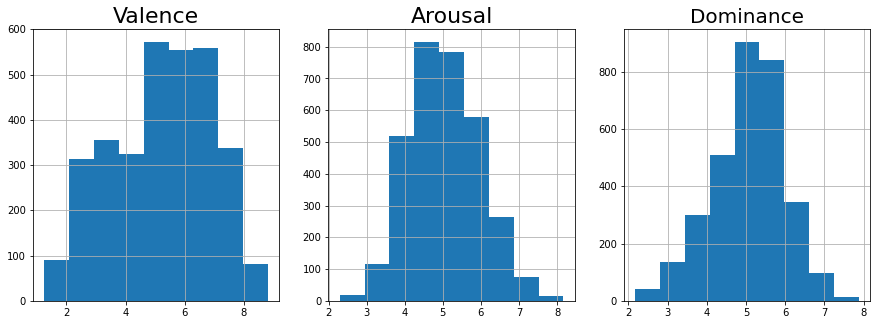

In [25]:
%matplotlib inline
print("ANEW")
plot_lexicon_hist(anew_lexicon, 'ValMn', 'AroMn', 'DomMn')

NRC


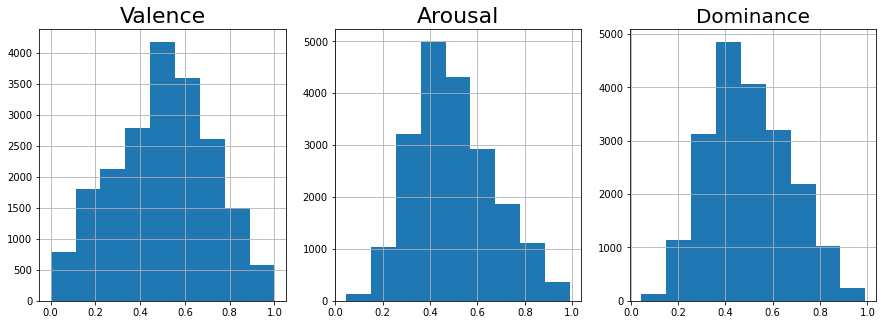

In [16]:
%matplotlib inline
print("NRC")
plot_lexicon_hist(nrc_lexicon, 'Valence', 'Arousal', 'Dominance')

In [ ]:
print("Overlapping between NLTK stopwords and NRC / ANEW lexicons")
print(set(nltk_stopwords).intersection(set(nrc_lexicon)),
      '\n',
      set(nltk_stopwords).intersection(set(anew_lexicon)))

In [ ]:
print("Overlapping between procedural words and NRC / ANEW lexicons")
print(set(procedural_words).intersection(set(nrc_lexicon)),
      '\n',
      set(procedural_words).intersection(set(anew_lexicon)))

In [ ]:
print("Overlapping between ordinal and cardinal number words and NRC / ANEW lexicons")
print(set(ordinal_cardinal_words).intersection(set(nrc_lexicon)),
      '\n',
      set(ordinal_cardinal_words).intersection(set(anew_lexicon)))

**Although the NRC lexicon has more data, ANEW might be more suitable for political text.**

## Data exploration

In [ ]:
len(data_df)

In [ ]:
data_df.groupby('Party').count().Tweet

In [ ]:
data_df[data_df.Party=='Democrat'].groupby('Handle').count().Tweet.describe()

In [ ]:
data_df[data_df.Party=='Republican'].groupby('Handle').count().Tweet.describe()

## Lexicon Corr

In [ ]:
anew_lexicon

In [ ]:
nrc_lexicon

In [ ]:
nrc_lexicon